# Drive'a Bağlanma ve içine girme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


# Veri Setini zip dosyasından çıkartma işlemi

In [ ]:
!unzip archive.zip


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Train/4047.jpg          
  inflating: Train/4049.jpg          
  inflating: Train/405.jpg           
  inflating: Train/4051.jpg          
  inflating: Train/4052.jpg          
  inflating: Train/4053.jpg          
  inflating: Train/4055.jpg          
  inflating: Train/4056.jpg          
  inflating: Train/4057.jpg          
  inflating: Train/4058.jpg          
  inflating: Train/4059.jpg          
  inflating: Train/406.jpg           
  inflating: Train/4060.jpg          
  inflating: Train/4061.jpg          
  inflating: Train/4062.jpg          
  inflating: Train/4065.jpg          
  inflating: Train/4066.jpg          
  inflating: Train/4068.jpg          
  inflating: Train/4069.jpg          
  inflating: Train/407.jpg           
  inflating: Train/4070.jpg          
  inflating: Train/4072.jpg          
  inflating: Train/4073.jpg          
  inflating: Train/4076.jpg          
  inflating: Train/4078.jpg          
  i

# csv dosyası okuma


In [ ]:
cd ..

/content


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()


,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [ ]:
df_class = df["Class"].tolist()
df_id = df["ID"].tolist()

# csv dosyasındaki kategorileri encode etme işlemi

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(df_class)

In [ ]:
encoded_label

array([0, 2, 0, ..., 0, 0, 0])

# train klasöründeki verilerin sayısını gösterme ve train, test spliti

In [ ]:
import glob
path = "Train/*.jpg"
images = glob.glob(path)
print(len(images))

19906


In [ ]:
# train ve test spliti manuel %20 test
train = list(zip(df_id[:13000], encoded_label[:13000]))
validation = list(zip(df_id[13000:15925], encoded_label[13000:15925]))
test = list(zip(df_id[15926:], encoded_label[15926:]))

# verierden ve classlardan birer adet gösterme işlemi

In [ ]:
from IPython.display import Image
liste = []
for i,j in test:
  if j not in liste:
    liste.append(i)
    liste.append(j)
for i in liste:
  print(i)


7421.jpg
0
9797.jpg
1
14698.jpg
2


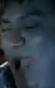

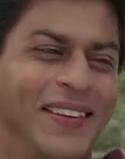

In [ ]:
path_class_0 = "Train/7421.jpg"
path_class_1 = "Train/9797.jpg"
path_class_2 = "Train/14698.jpg"

img0 = Image(path_class_0)
img1 = Image(path_class_1)
img2 = Image(path_class_2)
display(img0)
display(img1)
display(img2)

# Modelde Veri Sayısı Yeterlidir Image Augmentation Kullanılmaacaktır

# Imageleri rescale için ImageDataGenerator Kullanılacaktır

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainn_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)

# train validation ve test kısımları oluşturma

In [ ]:
# generator kısmı train
data_train = pd.DataFrame(train, columns=["filename", "class"])
data_train["class"] = data_train["class"].astype(str)
generator_train = trainn_generator.flow_from_dataframe(data_train, directory="Train/", x_col="filename", y_col="class",
                                                 target_size=(32, 32), class_mode="categorical",
                                                 batch_size=128, shuffle=True, seed=123)
# generator kısmı validation
data_val = pd.DataFrame(validation, columns=["filename", "class"])
data_val["class"] = data_val["class"].astype(str)
generator_validation = validation_generator.flow_from_dataframe(data_val, directory="Train/", x_col="filename", y_col="class",
                                                                target_size=(32, 32), class_mode="categorical", batch_size=32,
                                                                shuffle=True, seed=123)

Found 13000 validated image filenames belonging to 3 classes.
Found 2925 validated image filenames belonging to 3 classes.


# Model Oluşturma ve Model Özeti

model 1 overfitting gormek ıcın yapılan model

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.metrics import Recall, Precision, AUC, CategoricalAccuracy


In [ ]:
# model
def create_model():

  model = Sequential()
  model.add(Conv2D(64, kernel_size=(3, 3), padding="same", strides=(2, 2), activation="relu", input_shape=(32, 32, 3)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
  model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(2048, activation="relu"))

  model.add(Dense(3, activation="softmax"))

  model.summary()

  return model

model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                   

# MODELİN COMPİLE EDİLMESİ

In [ ]:
# compile
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Recall(), Precision(), CategoricalAccuracy()])


# MODELİN EĞİTİLMESİ VE HİSTORY DEĞİŞKENİNE VERİLERİN KAYDEDİLMESİ

In [ ]:
history = model.fit(generator_train, validation_data=generator_validation,epochs=25, verbose=1)

model.save("age_face_det1.h5")

Epoch 1/25
102/102 [==============================] - 27s 261ms/step - loss: 0.8267 - accuracy: 0.6218 - recall: 0.5468 - precision: 0.6514 - categorical_accuracy: 0.6218 - val_loss: 0.7325 - val_accuracy: 0.6783 - val_recall: 0.6212 - val_precision: 0.7076 - val_categorical_accuracy: 0.6783
Epoch 2/25
102/102 [==============================] - 24s 233ms/step - loss: 0.7347 - accuracy: 0.6754 - recall: 0.6060 - precision: 0.7135 - categorical_accuracy: 0.6754 - val_loss: 0.6866 - val_accuracy: 0.6988 - val_recall: 0.6441 - val_precision: 0.7336 - val_categorical_accuracy: 0.6988
Epoch 3/25
102/102 [==============================] - 25s 243ms/step - loss: 0.7001 - accuracy: 0.6942 - recall: 0.6330 - precision: 0.7326 - categorical_accuracy: 0.6942 - val_loss: 0.6595 - val_accuracy: 0.7149 - val_recall: 0.6646 - val_precision: 0.7471 - val_categorical_accuracy: 0.7149
Epoch 4/25
102/102 [==============================] - 25s 242ms/step - loss: 0.6486 - accuracy: 0.7172 - recall: 0.6672 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model 2 optimum epochta egitilen model

In [ ]:

model2 = create_model()
model.summary()

In [ ]:
# compile
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Recall(), Precision(), CategoricalAccuracy()])


In [ ]:
history = model2.fit(generator_train, validation_data=generator_validation,epochs=10, verbose=1)

model2.save("age_face_det2.h5")

model3 dropout kullanarak egitilmiş model

In [ ]:
  model3 = Sequential()
  model3.add(Conv2D(64, kernel_size=(3, 3), padding="same", strides=(2, 2), activation="relu", input_shape=(32, 32, 3)))
  model3.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
  model3.add(MaxPool2D(pool_size=(2, 2)))

  model3.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
  model3.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
  model3.add(MaxPool2D(pool_size=(2, 2)))

  model3.add(Flatten())
  model3.add(Dropout(0.2))
  model3.add(Dense(2048, activation="relu"))

  model3.add(Dense(3, activation="softmax"))


In [ ]:
# compile
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Recall(), Precision(), CategoricalAccuracy()])


In [ ]:
history = model3.fit(generator_train, validation_data=generator_validation,epochs=10, verbose=1)

model3.save("age_face_det2.h5")

# Model Verimliliiğinin Test Verilerinde Ölçümlenmesi

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
true = 0
total = 0
def prediction_fun(model_name):
  global true, total
  # Önceden eğitilmiş modelinizi yükleyin
  model = load_model(model_name)
  # Test edilecek resmin dosya yolu
  for imaj,label in test:

    test_image_path = f'Train/{imaj}'

    # Resmi yükleyin ve modele uygun hale getirin
    img = image.load_img(test_image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizasyon

    # Tahmin yapın
    predictions = model.predict(img_array)

    # Tahmin sonuçlarını yazdırın
    print("Tahmin Sonuçları:")
    print(np.argmax(predictions), label)

    if np.argmax(predictions) == label:
      true += 1
    total += 1



# Doğruluk oranının Tespiti

In [ ]:
print(prediction_fun("age_face_det.h5"))

77.06030150753769

# Model metriklerinin grafik Haline Getirilmesi

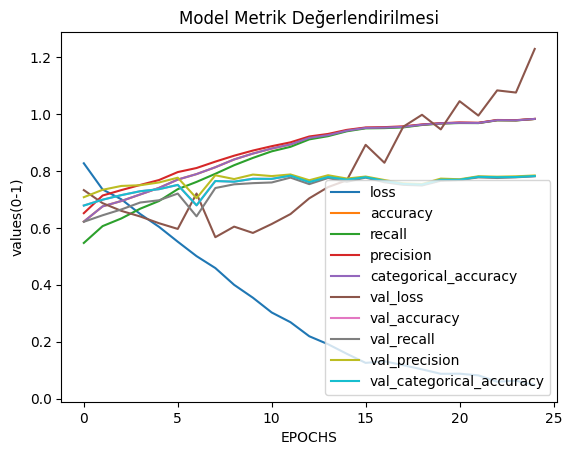

In [ ]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

metrics_plot = history_df.plot(title="Model Metrik Değerlendirilmesi", xlabel="EPOCHS", ylabel="values(0-1)")
metrics_plot.get_figure().savefig("metrikler.png")

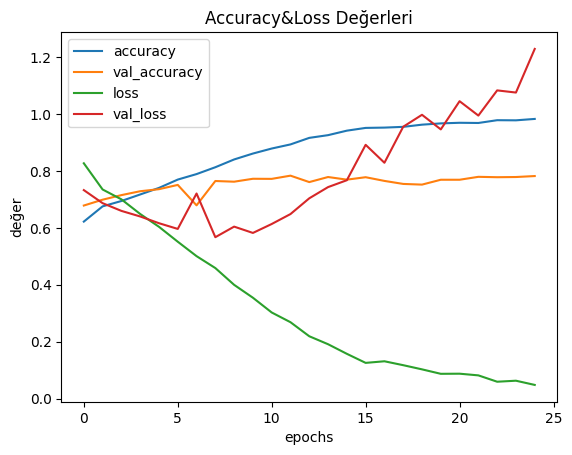

In [ ]:
accuracyies = history_df[["accuracy", "val_accuracy", "loss", "val_loss"]].plot(title="Accuracy&Loss Değerleri", xlabel="epochs", ylabel="değer")
accuracyies.get_figure().savefig("accuracy&loss.png")

# MODEL 10.EPOCHTAN SONRA VERİLERİ EZBERLEMEYE BAŞLIYOR VAL_LOSS VE LOSS DEĞERLERİNE BAKARAK ANLAŞILABİLİR

# VGG16 PRETRAİNED MODELİNİ KULLANARAK TEKRAR EĞİTİM İŞLEMİ

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# VGG16 modelini yükleyin (ağırlıklar 'imagenet' veri kümesinden alınacaktır)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Ana katmanları dondurun
for layer in base_model.layers:
    layer.trainable = False

# Yeni modeli oluşturun
model_vgg = Sequential()
model_vgg.add(base_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dense(3, activation='softmax'))  # Sınıflandırma probleminiz için uygun bir çıkış katmanı ekleyin

# Modeli derleyin
model_vgg.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

histotory_vgg16 = model_vgg.fit(generator_train, validation_data=generator_validation, epochs=25, verbose=1)

model_vgg.save("model_vgg16_pretrained.h5")

Epoch 1/25
102/102 [==============================] - 26s 239ms/step - loss: 0.5050 - accuracy: 0.6165 - val_loss: 0.4781 - val_accuracy: 0.6612
Epoch 2/25
102/102 [==============================] - 27s 263ms/step - loss: 0.4725 - accuracy: 0.6498 - val_loss: 0.4644 - val_accuracy: 0.6677
Epoch 3/25
102/102 [==============================] - 24s 236ms/step - loss: 0.4614 - accuracy: 0.6588 - val_loss: 0.4602 - val_accuracy: 0.6677
Epoch 4/25
102/102 [==============================] - 25s 245ms/step - loss: 0.4530 - accuracy: 0.6672 - val_loss: 0.4519 - val_accuracy: 0.6793
Epoch 5/25
102/102 [==============================] - 25s 241ms/step - loss: 0.4438 - accuracy: 0.6761 - val_loss: 0.4519 - val_accuracy: 0.6773
Epoch 6/25
102/102 [==============================] - 25s 244ms/step - loss: 0.4368 - accuracy: 0.6827 - val_loss: 0.4441 - val_accuracy: 0.6824
Epoch 7/25
102/102 [==============================] - 25s 249ms/step - loss: 0.4322 - accuracy: 0.6884 - val_loss: 0.4432 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# MODELİN TEST VERİLERİNDE DENENMESİ

In [ ]:
prediction_fun("model_vgg16_pretrained.h5")

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Tahmin Sonuçları:
2 2
1/1 [==============================] - 0s 20ms/step
Tahmin Sonuçları:
0 0
1/1 [==============================] - 0s 21ms/step
Tahmin Sonuçları:
0 0
1/1 [==============================] - 0s 21ms/step
Tahmin Sonuçları:
2 2
1/1 [==============================] - 0s 23ms/step
Tahmin Sonuçları:
2 0
1/1 [==============================] - 0s 21ms/step
Tahmin Sonuçları:
0 0
1/1 [==============================] - 0s 20ms/step
Tahmin Sonuçları:
0 1
1/1 [==============================] - 0s 20ms/step
Tahmin Sonuçları:
0 0
1/1 [==============================] - 0s 26ms/step
Tahmin Sonuçları:
0 0
1/1 [==============================] - 0s 20ms/step
Tahmin Sonuçları:
0 1
1/1 [==============================] - 0s 22ms/step
Tahmin Sonuçları:
1 1
1/1 [==============================] - 0s 21ms/step
Tahmin Sonuçları:
2 0
1/1 [==============================] - 0s 20ms/step
Tahmin Sonuçları:
1 0
1/1 [==============================] - 0s 2

# DOĞRULUK ORANI

In [ ]:
true/total * 100

68.39195979899498

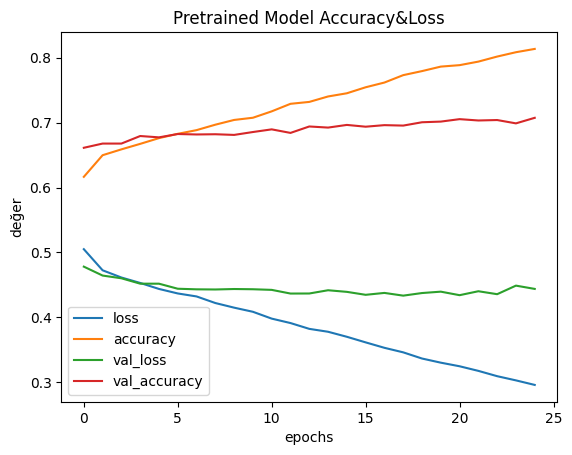

In [ ]:
history_vgg_df = pd.DataFrame(histotory_vgg16.history).plot(title="Pretrained Model Accuracy&Loss", xlabel="epochs", ylabel="değer")
history_vgg_df.get_figure().savefig("pretrained_accuracy_loss.png")

# PROBLEM ÇÖZÜM SÜRECİNİN DEĞERLENDİRİLMESİ

-Verisetinin pandas ile temizlenmesi ve train,test,validation kısımlarına ayrılması yapay zekadaki en önemli süreç olan data preprocessing işlemidir burada yapılan işlemlerin sağlıklı ve düzgün yapılmaması sonucunda yapay sinir ağlarında öğrenme gerçekleşmeyebilir.

-Yapay sinir ağlarındaki nöron sayısı, kernel boyutu, kaydırma adımları, aktivasyon fonksiyonları gibi bir çok parametre öğrenmeyi önemli ölçüde etkilemektedir. Overfitting durumunda image augmentation kullanılarak, dropout katmanları kullanılarak bu durum önlenebilir.

-resmin boyutları öğrenme kısmında önemlidir çünkü ayrıntı buna bağlı olarak değişir, vgg16 pretrained modeli kullanıldığında dense layerdaki nöron sayısını az tutarak nöron sayısının da öğrenmede etkili olduğu kısmına vurgu yapılmıştır.

# COMMON SENSE BASELİNE BELİRLENMESİ

In [ ]:
most_common_class = data_train['class'].value_counts()
most_common_class / len(data_train['class'])

0    0.542846
2    0.336538
1    0.120615
Name: class, dtype: float64